# Preparate a cropped image of the Thomas fire before and after scenes

In [1]:
from pathlib import Path
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from functions import crop_scene, load_scene, rgb_composite, save_scene

Load and crop the scene.

In [2]:
region = [4200, 6720, 4000, 5400]
before = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/thomas_fire_california_2017/LC08_L2SP_042036_20171123_20200902_02_T1/", 
        pattern="[2-7]",
    ),
    region,
)
after = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/thomas_fire_california_2017/LC08_L2SP_042036_20180126_20200902_02_T1/", 
        pattern="[2-7]",
    ),
    region,
)

Plot it to make sure it looks good.

In [3]:
rgb_before = rgb_composite(before, in_range=(5000, 18000))
rgb_after = rgb_composite(after, in_range=(5000, 18000))

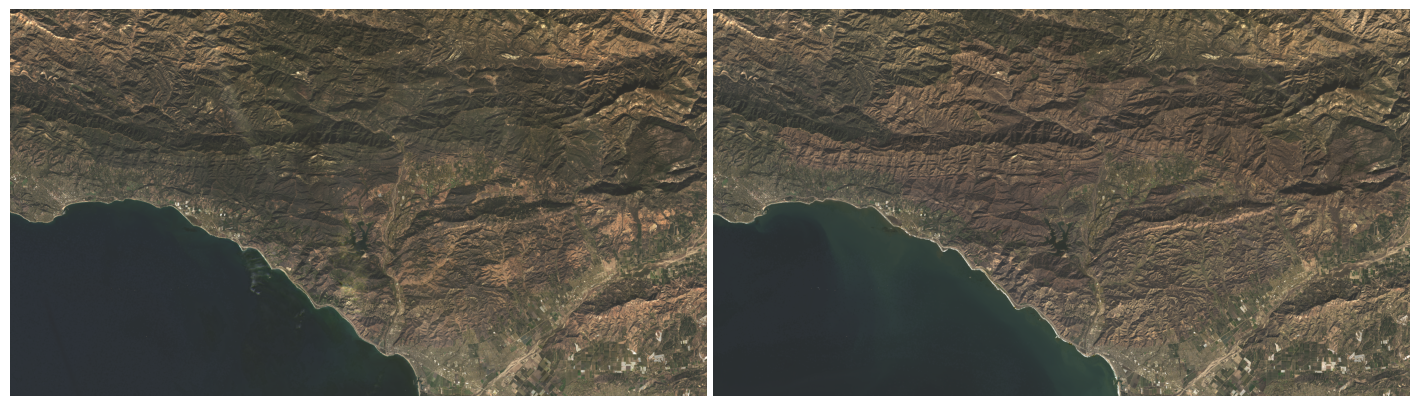

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=100)
ax1, ax2 = axes
ax1.imshow(rgb_before)
ax2.imshow(rgb_after)
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

Save the important bands of these scenes to TIF files.

In [5]:
data_folder = Path("../data/thomas_fire/")
scenes = [before, after]
destinations = [
    data_folder / "LC08_L2SP_042036_20171123_20200902_02_T1_cropped",
    data_folder / "LC08_L2SP_042036_20180126_20200902_02_T1_cropped",
]
prefixes = [
    "LC08_L2SP_042036_20171123_20200902_02_T1_",
    "LC08_L2SP_042036_20180126_20200902_02_T1_",
]
for scene, destination, prefix in zip(scenes, destinations, prefixes):
    save_scene(scene, destination, prefix)

In [7]:
! du -h ../data/thomas_fire/*/*

6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B2.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B3.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B4.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B5.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B6.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20171123_20200902_02_T1_cropped/LC08_L2SP_042036_20171123_20200902_02_T1_B7.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20180126_20200902_02_T1_cropped/LC08_L2SP_042036_20180126_20200902_02_T1_B2.TIF
6.8M	../data/thomas_fire/LC08_L2SP_042036_20180126_20200902_02_T1_cropped/LC08_L2SP_042036_20180126_20200902_02_T1_B3.TIF
6.8M	../data/thomas_fire